# IA Paper 4 - Mathematics - Examples paper 7

## Question 7 

For a certain linear system, the output $y(t)$ to an input $f(t)$ satisfies the differential equation  

$$ 
\frac{1}{12}  \left(2 \frac{d^2y}{dt^2} + 11 \frac{dy}{dt} + 12y \right) = f(t)
$$

(i) Find the step response of the system, by solving the equation with:  

$$
f(t) = \begin{cases}0 &  t < 0 \\  
                    1 &  t \geq 0 
       \end{cases} 
$$ 

and $y = dy/dt = 0$ for $t = 0$.  

(ii) Find the impulse response of the system.  

(iii) Hence find by convolution the system response to input 

$$
f(t) = \begin{cases}0 &  t < 0 \\  
            e^{-t} & t \geq 0
        \end{cases}
$$

assuming $y = dy/dt = 0$ for $t = 0$.   

(iv)
Suppose the differential equation describes a car’s suspension, with the input $f(t)$ representing the height of the road and the output $y(t)$ representing the height of the chassis. The car is to be driven over a rough track with height profile given in the file `f.dat`. The file (`f.dat`) contains 10000 numbers, which give the height profile $f(t)$. Each number is the height of the track at 50 ms intervals, as the car drives over it at constant speed. Use Python to plot (a) the road height as a function of time, (b) the suspension’s step response, (c) the suspension’s impulse response and (d) the height of the chassis as the car drives over the track. You might find it illuminating to plot $f(t)$ and $y(t)$ on the same axes, zooming in on, say, the first 25 s.

### Hints

(iv)(a) Use the code:

```python
import urllib.request
url = "https://raw.github.com/CambridgeEngineering/Part-IA-ExamplesPapers-Python/master/paper4/f.dat"
response = urllib.request.urlopen(url)
f_data = np.loadtxt(response, dtype=float)
```
to read in the data file from Internet, and the `plt.plot` command to plot it. 

(iv)(b) We have already found the step response algebraically, but `numpy.convolve` deals primarily with numerical data, not symbolic algebra. So we need to sample the step response at 50 ms intervals, to match the 50 ms sampling of the road height profile in `f`. We can generate the sample time points using the notation `t = np.arange(a, b, c)`, which produces a vector starting at `a`, finishing at `b`, at intervals of `c`. In this case, `a` should be 0, `c` should be 0.05 and `b` should be large enough to capture the step response up to the point where it has levelled off: experiment with different values of `b`. We can then evaluate arbitrary functions at these time points. For example, `h = np.sin(t)` evaluates the function $\sin(t)$ at the time points in $t$: try it and plot the resulting $h$. Use this approach to calculate and plot the step response.

iv)(c) Use the `t` vector from (b) to evaluate and plot the impulse response `g`.

(iv)(d) The Python command `np.convolve(f,g)` performs numerical convolution by multiply-ing and summing the elements of `f` and `g`. It does not take into account the time interval between the samples, so for a correctly scaled result we would need to calculate `0.05*np.convolve(f,g)`. To focus on the first 25s of data, we must look at `y[0:500]` and `f[0:500]`.

### Solution

First, let's load `numpy` and `matplotlib`. We can also configure the font size properties of `matplotlib` here.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The step response for this linear system is:

$$
h(t) = \begin{cases} 
    0 &  \quad t<0 \\  
    1 - \dfrac{8}{5}\exp\left( -\dfrac{3}{2}t \right) + \dfrac{3}{5}\exp(-4t) & \quad t\geq 0\\ 
        \end{cases} 
$$

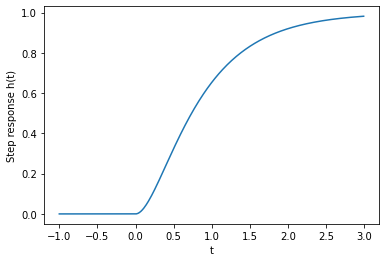

In [2]:
# Initlise the array for t
t = np.arange(-1.0, 3.0, 0.01)

# Initilise zero array for the step response
h = np.zeros(len(t))

# Generate the step response
for i in range(0, len(t)):
    if t[i] >= 0:
        h[i] = 1 - (8.0/5.0)*np.exp(-1.5*t[i]) + (3.0/5.0)*np.exp(-4*t[i])

# Plot the step response
plt.plot(t, h)
plt.xlabel('t')
plt.ylabel('Step response h(t)');

The impulse response for this linear system is:

$$
g(t) = \begin{cases} 
    0 &  \quad t<0 \\  
    \dfrac{12}{5}\exp \left( -\dfrac{3}{2}t \right) - \dfrac{12}{5}\exp(-4t) & \quad t\geq 0\\ 
        \end{cases} 
$$

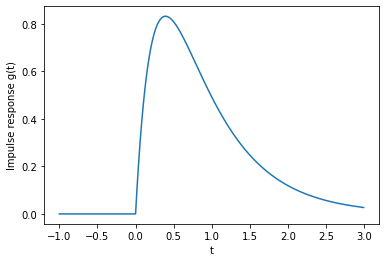

In [3]:
# Initilise zero array for the impulse response
g = np.zeros(len(t))

# Generate the impulse response
for i in range(0, len(t)):
    if t[i] >= 0:
        g[i] = (12.0/5.0)*np.exp(-1.5*t[i]) - (12.0/5.0)*np.exp(-4*t[i])

# Plot the impulse response
plt.plot(t, g)
plt.xlabel('t')
plt.ylabel('Impulse response g(t)');

For the input signal of $f(t)$, our output signal $y(t)$ is as followed:

$$
y(t) = \begin{cases} 
    0 &   t < 0 \\  
    \dfrac{12}{15} \left[ \exp( -4t ) - 6\exp(-\dfrac{3}{2}t) + 5\exp(-t) \right] & t\geq 0 
        \end{cases} 
$$

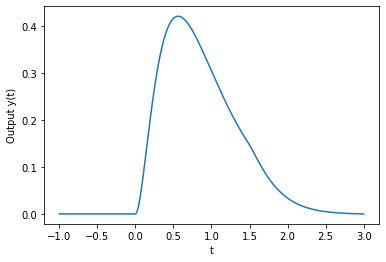

In [4]:
# Initilise zero array for the input signal
f = np.zeros(len(t))

# Generate the input
for i in range(0, len(t)):
    if t[i] >= 0:
        f[i] = np.exp(-t[i])

# Obtain the output by convolving the input with the impulse response
# (the correcting scale of 0.01 is required for the interval of the discrete t)
y = 0.01*np.convolve(f, g)

# The convolved returns an array of length len(f)+len(g)-1, so we need to generate
# a new t-array that is compatible with y for plotting.
t_plot = np.linspace(-1.0, 3.0, len(y))

# Now we can plot the output y
plt.plot(t_plot, y)
plt.xlabel('t')
plt.ylabel('Output y(t)');

For section (iv), we can load the provided data from the `dat` file into a `numpy` array and plot it. 

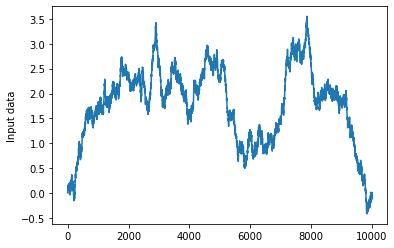

In [5]:
# Read in data file from URL
import urllib.request
url = "https://raw.github.com/CambridgeEngineering/Part-IA-ExamplesPapers-Python/master/paper4/f.dat"
response = urllib.request.urlopen(url)
f_data = np.loadtxt(response, dtype=float)

# Plot the data
plt.plot(f_data)
plt.ylabel("Input data");

We can generate the impulse response for this data. Students are encouraged to explore the range of the impulse response as indicated in the hint. 

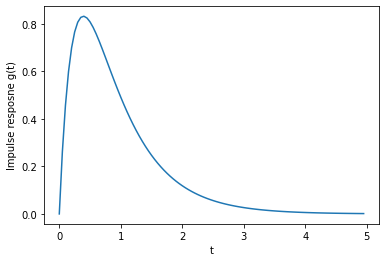

In [6]:
# Generate the impulse response for the data
# FOR STUDENTS: Try changing the range of t_data
t_data = np.arange(0.0, 5.0, 0.05)
g_data = (12.0/5.0)*(np.exp(-1.5*t_data) - np.exp(-4*t_data))

# Plot the impulse response
plt.plot(t_data, g_data)
plt.xlabel('t')
plt.ylabel('Impulse resposne g(t)');

The output $y(t)$ can then be achieved by convolving the provided data with the impulse response.

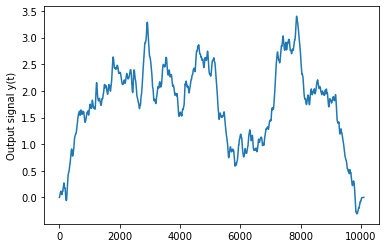

In [7]:
# Now work out the output by convolving f_data with the impulse response g_data
y_data = 0.05*np.convolve(f_data, g_data)
plt.plot(y_data)
plt.ylabel('Output signal y(t)');

Let's compare our output $y(t)$ with the input $f(t)$. First we look at the first 500 entries of both arrays `y_data` and `f_data`.  

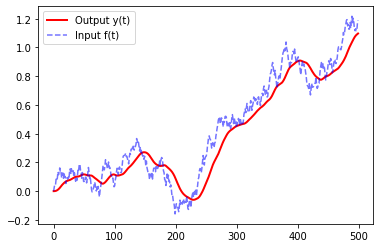

In [8]:
# Compare the first 500 entries between the input f_data and the output y_data
plt.plot(y_data[0:500], 'r', lw=2.0, label='Output y(t)')
plt.plot(f_data[0:500], 'b', ls='--', alpha=0.55, label='Input f(t)')
plt.legend(loc=2);

We can now look at the big picture by plotting both of them on the same graph. 

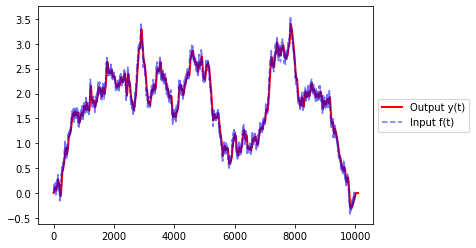

In [9]:
# Compare the entire input f_data and the output y_data
plt.plot(y_data, 'r', lw=2.0, label='Output y(t)')
plt.plot(f_data, 'b', ls='--', alpha=0.55, label='Input f(t)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));